<a href="https://colab.research.google.com/github/SadhanaSrinivasan/Goa-Tourism-Classification/blob/master/GoaClassify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai import *
from fastai.vision import *
import numpy as np

In [0]:
!pwd

/content


Took the below step for train val split from https://towardsdatascience.com/create-and-deploy-an-image-classifier-using-fastai-and-render-in-15-mins-947f9de42d21

##Creating the dataset

In [0]:
path="/content/drive/My Drive/2020 sih"

In [0]:
tfms = get_transforms(do_flip=False)

In [0]:
data = ImageDataBunch.from_folder(path,ds_tfms=tfms, size=100)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
st.alex church, splashdown water park goa, menezes braganza house, viceroys arch, our lady ...
  if getattr(ds, 'warn', False): warn(ds.warn)


##Just pringitng some data

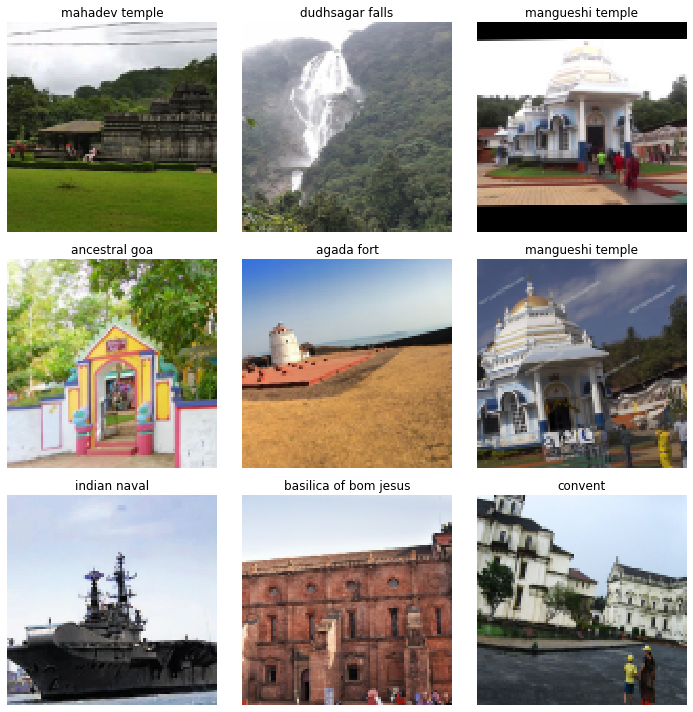

In [0]:
data.show_batch(rows=3, figsize=(10,10))


##Training


In [0]:
my_trained_mod = create_cnn(data, models.densenet201, metrics=error_rate)
my_trained_mod.fit_one_cycle(6)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:02<00:00, 33.4MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.821225,1.307599,0.404908,03:24
1,1.636332,0.724084,0.208589,03:24
2,1.089739,0.622535,0.159509,03:22
3,0.807980,0.612146,0.177914,03:21
4,0.618352,0.557663,0.171779,03:22
5,0.491369,0.510293,0.141104,03:22


##Checking or Test

In [0]:
print("keep running")

keep running


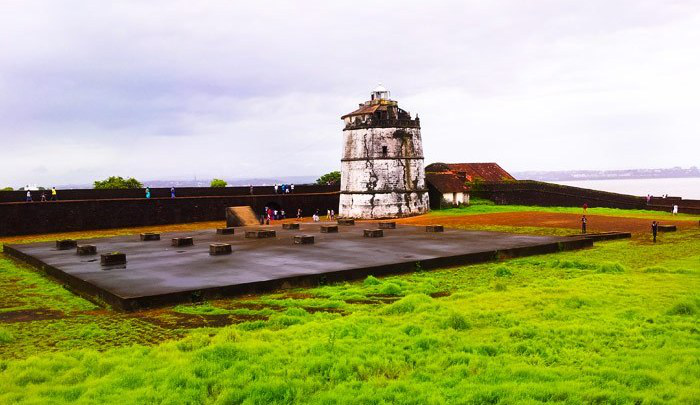

In [0]:
filename = "/content/drive/My Drive/2020 sih/test/Fort-Aguada_Manav-Narula.jpg"
img = open_image(filename)
img

In [0]:
pred = my_trained_mod.predict(img)
print(pred)

(Category agada fort, tensor(0), tensor([9.8124e-01, 3.8751e-04, 1.8376e-02]))


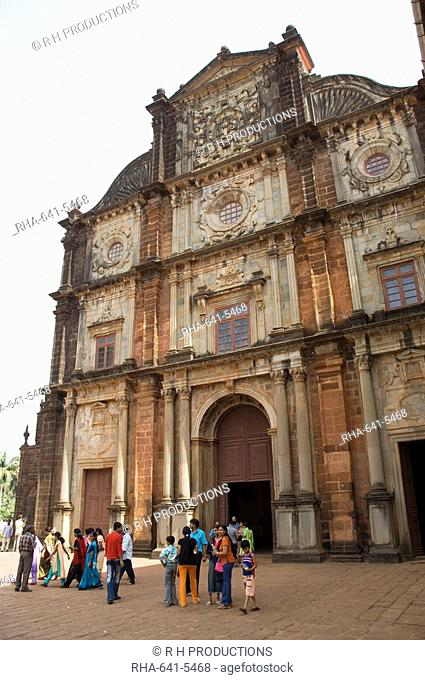

In [0]:
filename = "/content/drive/My Drive/2020 sih/test/rha-641-5468.jpg"
img = open_image(filename)
img


In [0]:
pred = my_trained_mod.predict(img)
print(pred)

(Category basilica of bom jesus, tensor(1), tensor([2.8837e-05, 9.9712e-01, 2.8472e-03]))


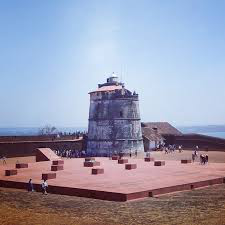

In [0]:
filename = "/content/drive/My Drive/2020 sih/test/images (1).jfif"
img = open_image(filename)
img

In [0]:
pred = my_trained_mod.predict(img)
print(pred)

(Category agada fort, tensor(0), tensor([9.9996e-01, 2.2771e-09, 3.9180e-05]))


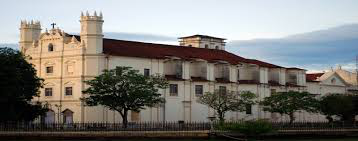

In [0]:
filename = "/content/drive/My Drive/2020 sih/test/images (2).jfif"
img = open_image(filename)
img

In [0]:
pred = my_trained_mod.predict(img)
print(pred)

(Category convent, tensor(2), tensor([0.0261, 0.2095, 0.7644]))


In [0]:
filename = "/content/drive/My Drive/2020 sih/test/Fort_aguada.jpg"
img = open_image(filename)
img

In [0]:
pred = my_trained_mod.predict(img)
print(pred)

(Category agada fort, tensor(0), tensor([9.9225e-01, 1.3351e-04, 7.6167e-03]))


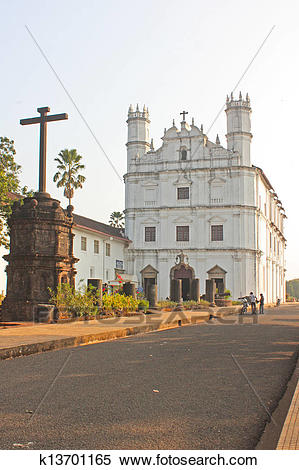

In [0]:
filename = "/content/drive/My Drive/2020 sih/test/convent-church-of-st-francis-of-stock-photography__k13701165.jpg"
img = open_image(filename)
img

In [0]:
pred = my_trained_mod.predict(img)
print(pred)

(Category basilica of bom jesus, tensor(1), tensor([0.0125, 0.5667, 0.4208]))


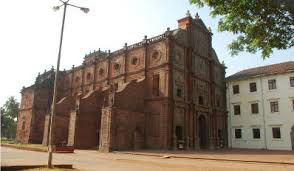

In [0]:
filename = "/content/drive/My Drive/2020 sih/test/download.jfif"
img = open_image(filename)
img

In [0]:
pred = my_trained_mod.predict(img)
print(pred)

(Category basilica of bom jesus, tensor(1), tensor([1.0375e-05, 9.9950e-01, 4.9317e-04]))


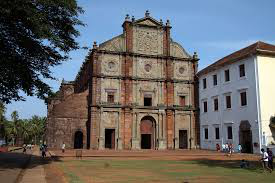

In [0]:
filename = "/content/drive/My Drive/2020 sih/test/images.jfif"
img = open_image(filename)
img

In [0]:
pred = my_trained_mod.predict(img)
print(pred)

(Category basilica of bom jesus, tensor(1), tensor([6.1510e-05, 9.9262e-01, 7.3145e-03]))


In [0]:
my_trained_mod.export()

In [0]:
my_trained_mod.save("model_fastai_given_indoc")